<a href="https://colab.research.google.com/github/taitip-supha/DeepLearn-Keras/blob/main/02_CNN/CNN01_Senquential_NonSenquential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create CNN with Sequential API and Function API

# 1. Prepar the Enviroment

In [ ]:
# List all NVIDIA GPUs as avaiable in this computer (or colub's session)
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-f69ba358-48e7-64a5-2035-3bb7b636ddba)


In [ ]:
#Import package
import sys
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
%matplotlib inline
print(f"Python {sys.version}")
print(f"NumPy {np.__version__}")
print(f"tf.keras.backend.image_data_format() = {tf.keras.backend.image_data_format()}")
gpus = tf.config.list_physical_devices('GPU')
print(f"Tensorflow detected : {len(gpus)} GPU(s)")
for i,gpu in enumerate(gpus):
  print(f" GPU No. {i} : Name = {gpu.name} , Type = {gpu.device_type}")


Python 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
NumPy 1.19.5
tf.keras.backend.image_data_format() = channels_last
Tensorflow detected : 1 GPU(s)
 GPU No. 0 : Name = /physical_device:GPU:0 , Type = GPU


# 2. Create Sequential CNN

In [ ]:
input_1channel = (502,502,1)    # 1-Channel image
input_3channel = (502,502,3)    # 3-Channel image
input_dim = input_3channel # Choose the target dimension for this example
output_dim = 1000   #the number of output classes (Single-lable multi-class classification)

## 2.1 CNN with Sequential API

In [ ]:
model1 = tf.keras.models.Sequential()

#1) input layer
model1.add(tf.keras.Input(shape=input_dim))

#2.1) Hidden Layer : Feature extractor
model1.add( tf.keras.layers.Conv2D(filters=128, kernel_size=7, activation='relu', padding='valid'))
model1.add( tf.keras.layers.Conv2D(filters=64  , kernel_size=5, activation='relu', padding='valid'))
model1.add( tf.keras.layers.MaxPool2D(pool_size=2))
model1.add( tf.keras.layers.BatchNormalization(axis=-1))
model1.add( tf.keras.layers.Conv2D(filters=32  , kernel_size=3, activation='relu', padding='same'))
model1.add( tf.keras.layers.Conv2D(filters=16  , kernel_size=3, activation='relu', padding='same' ,strides=2))
model1.add( tf.keras.layers.Conv2D(filters=16  , kernel_size=3, activation='relu', padding='valid' ,strides=2))
model1.add( tf.keras.layers.BatchNormalization(axis=-1))

#2.2) Hidden Layer : Classifier
model1.add( tf.keras.layers.Flatten()) #flat the input from Feature Extractor Shape=(batch_size,?)
model1.add( tf.keras.layers.Dense(1024, activation='relu' ))
model1.add( tf.keras.layers.Dropout(0.5))
model1.add( tf.keras.layers.Dense(1024, activation= 'relu' ))
model1.add( tf.keras.layers.Dropout(0.5))

#3) output layer
model1.add( tf.keras.layers.Dense(output_dim, activation='softmax'))


In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 496, 496, 128)     18944     
                                                                 
 conv2d_3 (Conv2D)           (None, 492, 492, 64)      204864    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 246, 246, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization_1 (Batc  (None, 246, 246, 64)     256       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 246, 246, 32)      18464     
                                                                 
 conv2d_5 (Conv2D)           (None, 123, 123, 16)     

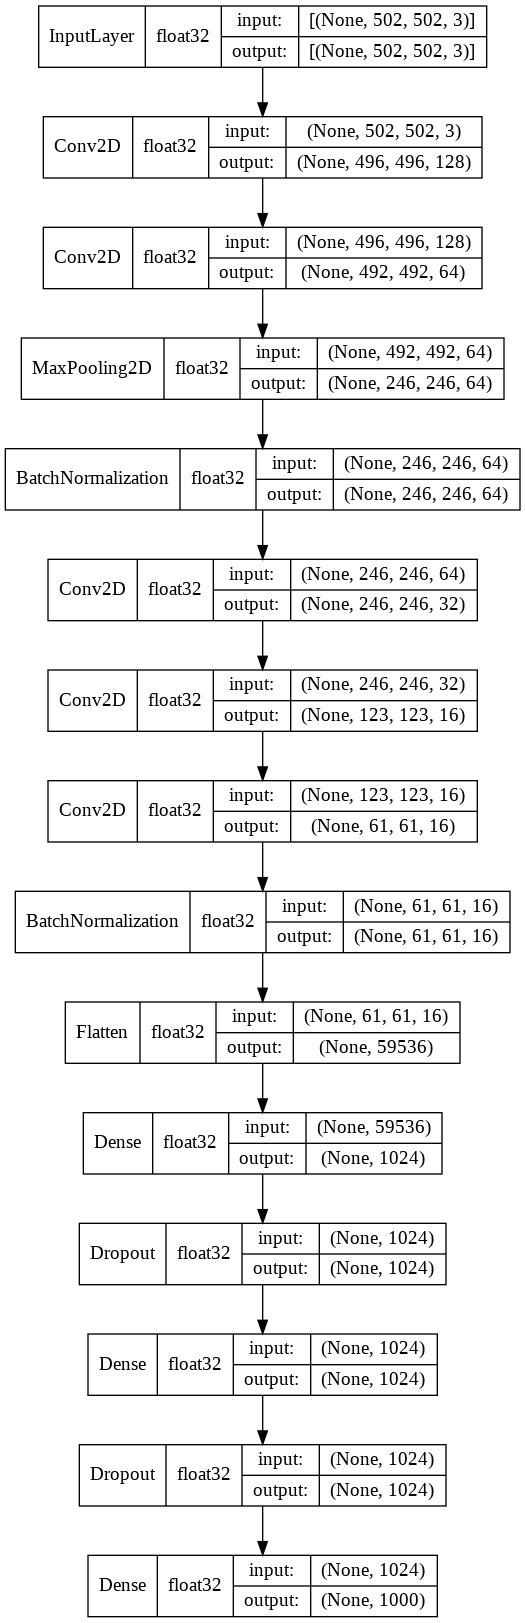

In [ ]:
tf.keras.utils.plot_model(model1, to_file='cnn1_sequential.png', show_shapes=True, 
                          show_dtype=True, show_layer_names=False, dpi=96)

## 2.2 CNN with Functional API

In [ ]:
#1) input layer
inputs = tf.keras.Input(shape=input_dim)

#2.1) Hidden Layer : Feature extractor
x = tf.keras.layers.Conv2D(filters=128, kernel_size=7, activation='relu', padding='valid')(inputs)
x = tf.keras.layers.Conv2D(filters=64  , kernel_size=5, activation='relu', padding='valid')(x)
x = tf.keras.layers.MaxPool2D(pool_size=2)(x)
x = tf.keras.layers.BatchNormalization(axis=-1)(x)
x = tf.keras.layers.Conv2D(filters=32  , kernel_size=3, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(filters=16  , kernel_size=3, activation='relu', padding='same' ,strides=2)(x)
x = tf.keras.layers.Conv2D(filters=16  , kernel_size=3, activation='relu', padding='valid' ,strides=2)(x)
x = tf.keras.layers.BatchNormalization(axis=-1)(x)

#2.2) Hidden Layer : Classifier
x = tf.keras.layers.Flatten()(x) #flat the input from Feature Extractor Shape=(batch_size,?)
x = tf.keras.layers.Dense(1024, activation='relu' )(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(1024, activation= 'relu' )(x)
x = tf.keras.layers.Dropout(0.5)(x)

#3) output layer
outputs = tf.keras.layers.Dense(output_dim, activation='softmax')(x)

#4) Construct the model
model2 = tf.keras.models.Model(inputs=inputs, outputs =outputs )

In [ ]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 502, 502, 3)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 496, 496, 128)     18944     
                                                                 
 conv2d_13 (Conv2D)          (None, 492, 492, 64)      204864    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 246, 246, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization_5 (Batc  (None, 246, 246, 64)     256       
 hNormalization)                                                 
                                                                 
 conv2d_14 (Conv2D)          (None, 246, 246, 32)      18464 

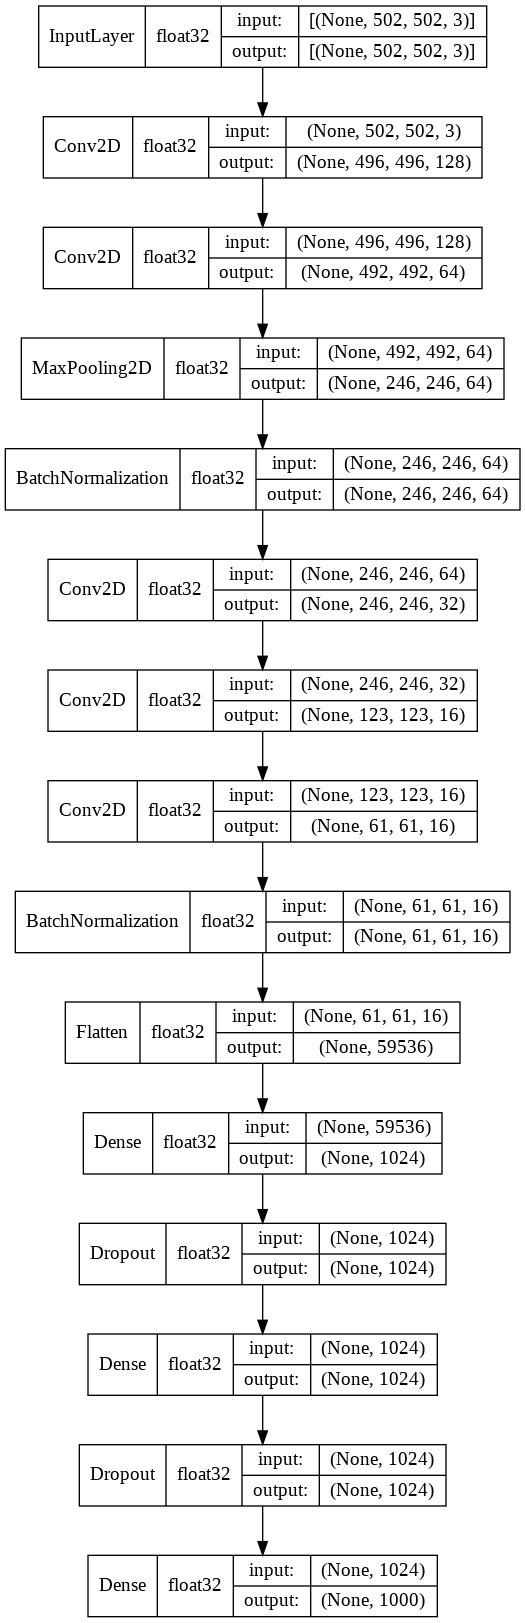

In [ ]:
tf.keras.utils.plot_model(model2, to_file='cnn2_sequential.png', show_shapes=True, 
                          show_dtype=True, show_layer_names=False, dpi=96)

## 2.3 Test using the Model (with Random inputs)

In [ ]:
batch_size = 7
x = np.random.rand(batch_size ,*input_dim).astype(np.float32)
print( f"x.shape={x.shape}, x.dtype={x.dtype}, min(x)={np.min(x):.4f} ,max(x)={np.max(x):.4f}")

x.shape=(7, 502, 502, 3), x.dtype=float32, min(x)=0.0000 ,max(x)=1.0000


In [ ]:
%%time
#pass the data to model1 that create by Sequential API
y_pred1 = model1.predict(x)
print( f"y_pred1.shape={y_pred1.shape}, y_pred1.dtype={y_pred1.dtype}, min(y_pred1)={np.min(y_pred1):.4f} ,max(y_pred1)={np.max(y_pred1):.4f}")

y_pred1.shape=(7, 1000), y_pred1.dtype=float32, min(y_pred1)=0.0009 ,max(y_pred1)=0.0011
CPU times: user 7.27 s, sys: 1.02 s, total: 8.29 s
Wall time: 14.1 s


In [ ]:
%%time
#pass the data to model1 that create by Functional API
y_pred2 = model2.predict(x)
print( f"y_pred2.shape={y_pred2.shape}, y_pred2.dtype={y_pred2.dtype}, min(y_pred2)={np.min(y_pred2):.4f} ,max(y_pred1)={np.max(y_pred2):.4f}")

y_pred2.shape=(7, 1000), y_pred2.dtype=float32, min(y_pred2)=0.0009 ,max(y_pred1)=0.0011
CPU times: user 317 ms, sys: 26.8 ms, total: 344 ms
Wall time: 347 ms


# 3. Create a non-sequential CNN

Create Deeplearning ***input 2 Branch*** from 1-ChannelImage and 3-ChannelImage and ***output 2 channel*** Regression and Classification

In [ ]:
input1_dim = (224,224,1) # 1-Channel image
input2_dim = (224,224,3) # 3-Channel image

output_reg_dim = 4    # then number of output node for the regression head
output_cls_dim  = 20  # then number of output node for the classification head

## 3.1 non-sequential with Functional API

In [ ]:
from os import name
# Branch 1 : Feature Extraction for Regression
img1ch = tf.keras.Input(shape=input1_dim ,name='x1')
x = tf.keras.layers.Conv2D(filters=32 ,kernel_size=3, activation='relu', padding='valid')(img1ch)
x = tf.keras.layers.MaxPool2D(pool_size=2)(x)
x = tf.keras.layers.BatchNormalization(axis=-1)(x)
x = tf.keras.layers.Conv2D(filters=32 ,kernel_size=3, activation='relu', padding='valid')(x)
x = tf.keras.layers.MaxPool2D(pool_size=2)(x)
x = tf.keras.layers.BatchNormalization(axis=-1)(x)
out_branch1ch = tf.keras.layers.Flatten()(x)

# Branch 2 :  Feature Extraction for classification
img3ch = tf.keras.Input(shape=input2_dim ,name='x2')
x = tf.keras.layers.Conv2D(filters=32 ,kernel_size=3, activation='relu', padding='valid')(img3ch)
x = tf.keras.layers.MaxPool2D(pool_size=2)(x)
x = tf.keras.layers.BatchNormalization(axis=-1)(x)
x = tf.keras.layers.Conv2D(filters=32 ,kernel_size=3, activation='relu', padding='valid')(x)
x = tf.keras.layers.MaxPool2D(pool_size=2)(x)
x = tf.keras.layers.BatchNormalization(axis=-1)(x)
out_branch3ch = tf.keras.layers.Flatten()(x)

# Regression Head
x = tf.keras.layers.Dense(512, activation='relu')(out_branch1ch)
out_reg = tf.keras.layers.Dense(output_reg_dim, name='out_regress')(x)

# Classfication Head
x = tf.keras.layers.Concatenate(axis=-1)([out_branch1ch, out_branch3ch])
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
out_cls = tf.keras.layers.Dense(output_cls_dim, activation='softmax', name='out_class')(x)

# Construct the model
model3 = tf.keras.models.Model(inputs=[img1ch, img3ch], outputs=[out_reg, out_cls])

In [ ]:
model3.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 x1 (InputLayer)                [(None, 224, 224, 1  0           []                               
                                )]                                                                
                                                                                                  
 x2 (InputLayer)                [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_29 (Conv2D)             (None, 222, 222, 32  320         ['x1[0][0]']                     
                                )                                                           

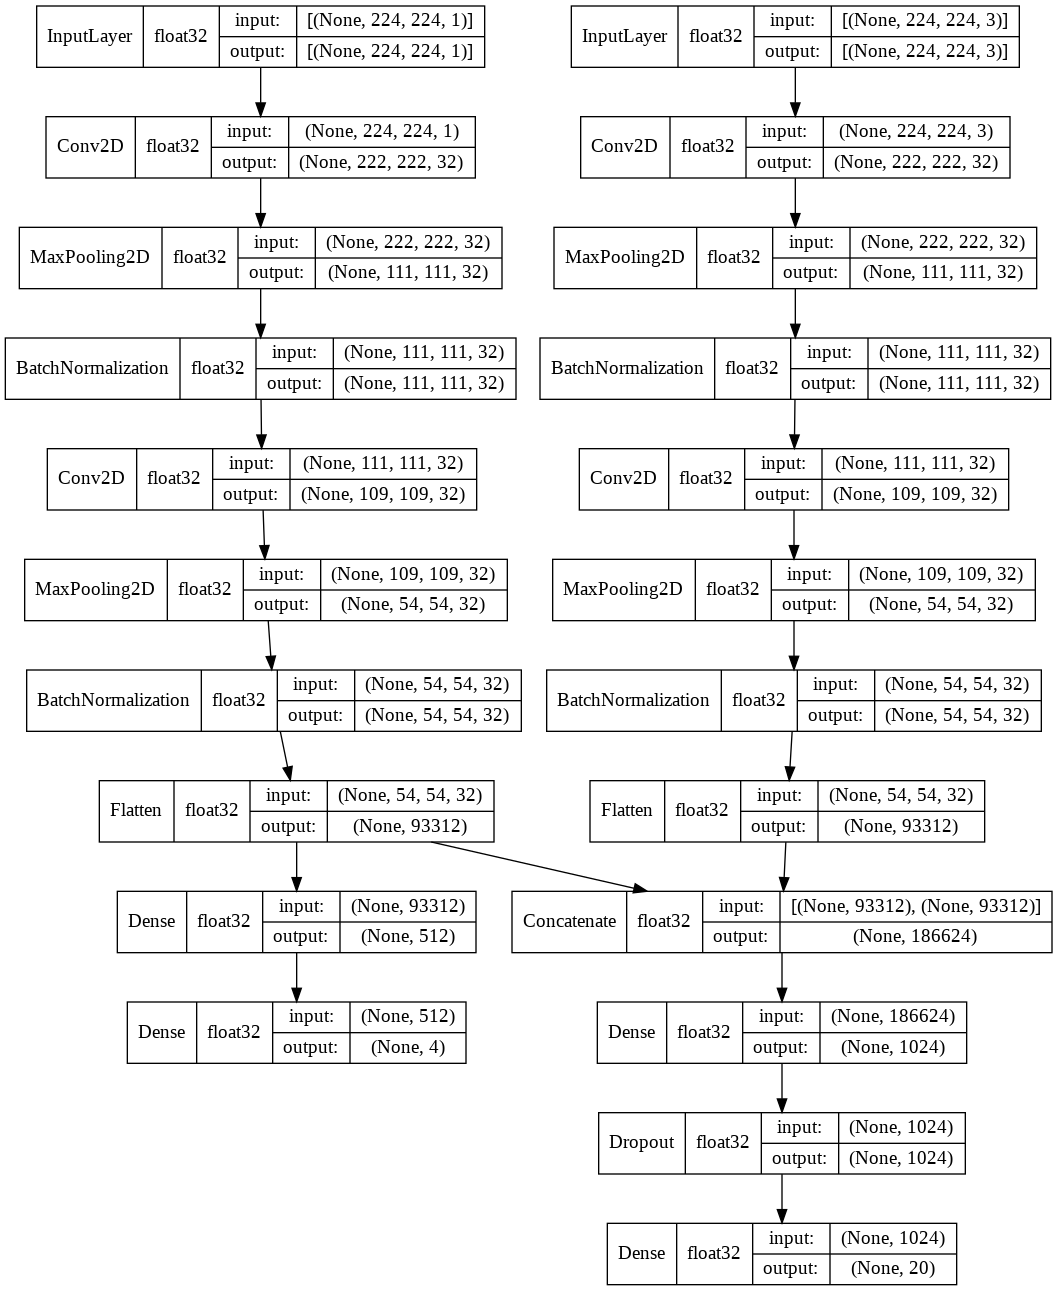

In [ ]:
tf.keras.utils.plot_model(model3, to_file='non_sequential.png', show_shapes=True, 
                          show_dtype=True, show_layer_names=False, dpi=96)

## 3.2 Test using the Model (with Random inputs)

In [ ]:
batch_size = 7
x1 = np.random.rand(batch_size ,*input1_dim).astype(np.float32)
x2 = np.random.rand(batch_size ,*input2_dim).astype(np.float32)

print( f"x1.shape={x1.shape}, x1.dtype={x1.dtype}, min(x1)={np.min(x1):.4f} ,max(x1)={np.max(x1):.4f}")
print( f"x2.shape={x2.shape}, x2.dtype={x2.dtype}, min(x2)={np.min(x2):.4f} ,max(x2)={np.max(x2):.4f}")

x1.shape=(7, 224, 224, 1), x1.dtype=float32, min(x1)=0.0000 ,max(x1)=1.0000
x2.shape=(7, 224, 224, 3), x2.dtype=float32, min(x2)=0.0000 ,max(x2)=1.0000


In [ ]:
%%time
#pass the data to model1 that create by Sequential API
y_pred_reg, y_pred_cls = model3.predict([x1,x2])
print( f"y_pred_reg.shape={y_pred_reg.shape}, y_pred_reg.dtype={y_pred_reg.dtype}, min(y_pred_cls)={np.min(y_pred_reg):.4f} ,max(y_pred_reg)={np.max(y_pred_reg):.4f}")
print( f"y_pred_cls.shape={y_pred_cls.shape}, y_pred_cls.dtype={y_pred_cls.dtype}, min(y_pred_cls)={np.min(y_pred_cls):.4f} ,max(y_pred_cls)={np.max(y_pred_cls):.4f}")

y_pred_reg.shape=(7, 4), y_pred_reg.dtype=float32, min(y_pred_cls)=-0.4778 ,max(y_pred_reg)=0.5504
y_pred_cls.shape=(7, 20), y_pred_cls.dtype=float32, min(y_pred_cls)=0.0332 ,max(y_pred_cls)=0.0700
CPU times: user 407 ms, sys: 10.5 ms, total: 418 ms
Wall time: 422 ms


# My CNN & MLP with MNIST
MNIST dataset for handwritten digit classification. 10 Class( 0 - 9) with image size 28x28 pixel 

## Load Data set

In [ ]:
mnist = tf.keras.datasets.mnist

#Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print( f"x_train.shape={x_train.shape}, x_train.dtype={x_train.dtype}, min(x_train)={np.min(x_train):.4f} ,max(x_train)={np.max(x_train):.4f}")
print( f"x_test.shape={x_test.shape}, x_test.dtype={x_test.dtype}, min(x_test)={np.min(x_test):.4f} ,max(x_test)={np.max(x_test):.4f}\n")
print( f"y_train.shape={y_train.shape}, y_train.dtype={y_train.dtype}, min(y_train)={np.min(y_train):.4f} ,max(y_train)={np.max(y_train):.4f}")
print( f"y_test.shape={y_test.shape}, y_test.dtype={y_test.dtype}, min(y_test)={np.min(y_test):.4f} ,max(y_test)={np.max(y_test):.4f}")

11501568/11490434 [==============================] - 0s 0us/step
x_train.shape=(60000, 28, 28), x_train.dtype=uint8, min(x_train)=0.0000 ,max(x_train)=255.0000
x_test.shape=(10000, 28, 28), x_test.dtype=uint8, min(x_test)=0.0000 ,max(x_test)=255.0000

y_train.shape=(60000,), y_train.dtype=uint8, min(y_train)=0.0000 ,max(y_train)=9.0000
y_test.shape=(10000,), y_test.dtype=uint8, min(y_test)=0.0000 ,max(y_test)=9.0000


In [ ]:
#Normalized data
x_train, x_test = x_train / 255.0, x_test / 255.0
print( f"x_train.shape={x_train.shape}, x_train.dtype={x_train.dtype}, min(x_train)={np.min(x_train):.4f} ,max(x_train)={np.max(x_train):.4f}")
print( f"x_test.shape={x_test.shape}, x_test.dtype={x_test.dtype}, min(x_test)={np.min(x_test):.4f} ,max(x_test)={np.max(x_test):.4f}\n")

x_train.shape=(60000, 28, 28), x_train.dtype=float64, min(x_train)=0.0000 ,max(x_train)=1.0000
x_test.shape=(10000, 28, 28), x_test.dtype=float64, min(x_test)=0.0000 ,max(x_test)=1.0000



In [ ]:
from tensorflow.keras.utils import to_categorical
#y_train = to_categorical(y_train, len(set(y_train)))
#y_test = to_categorical(y_test, len(set(y_test)))
print( f"y_train.shape={y_train.shape}, y_train.dtype={y_train.dtype}")
print( f"y_test.shape={y_test.shape}  , y_test.dtype={y_test.dtype}  ")

y_train.shape=(60000, 10), y_train.dtype=float32
y_test.shape=(10000, 10)  , y_test.dtype=float32  


In [ ]:
my_input_dim = (28,28,1) # Choose the target dimension for this example
my_output_dim = 10   #the number of output classes (Single-lable multi-class classification)

## Design, train and evaluate one CNN

In [ ]:
cnn_model = tf.keras.models.Sequential()

#1) input layer
cnn_model.add(tf.keras.Input(shape=my_input_dim))

#2.1) Hidden Layer : Feature extractor
cnn_model.add( tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'))
cnn_model.add( tf.keras.layers.MaxPool2D(pool_size=2))
cnn_model.add( tf.keras.layers.BatchNormalization(axis=-1))

cnn_model.add( tf.keras.layers.Conv2D(filters=32  , kernel_size=3, activation='relu', padding='same'))
cnn_model.add( tf.keras.layers.BatchNormalization(axis=-1))

#2.2) Hidden Layer : Classifier
cnn_model.add( tf.keras.layers.Flatten()) #flat the input from Feature Extractor Shape=(batch_size,?)
cnn_model.add( tf.keras.layers.Dense(256, activation='relu' ))
cnn_model.add( tf.keras.layers.Dropout(0.5))
cnn_model.add( tf.keras.layers.Dense(256, activation= 'relu' ))
cnn_model.add( tf.keras.layers.Dropout(0.5))

#3) output layer
cnn_model.add( tf.keras.layers.Dense(my_output_dim, activation='softmax'))
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 14, 14, 64)       256       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 batch_normalization_7 (Batc  (None, 14, 14, 32)       128       
 hNormalization)                                                 
                                                      

In [ ]:
#Check model can imprement
%%time
#pass the data to model1 that create by Sequential API
y_mlp_pred = cnn_model.predict(x_test[0:7])
print( f"y_mlp_pred.shape={y_mlp_pred.shape}, y_mlp_pred.dtype={y_mlp_pred.dtype}, min(y_mlp_pred)={np.min(y_mlp_pred):.4f} ,max(y_mlp_pred)={np.max(y_mlp_pred):.4f}")

y_mlp_pred.shape=(7, 10), y_mlp_pred.dtype=float32, min(y_mlp_pred)=0.0919 ,max(y_mlp_pred)=0.1104
CPU times: user 100 ms, sys: 1.61 ms, total: 102 ms
Wall time: 101 ms


In [ ]:
#complie with default values for both optimizer and loss
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) #categorical_crossentropy
cnn_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
#Train the model on train set
%%time
cnn_history = cnn_model.fit(x_train, y_train, batch_size=128, epochs=25, verbose=1, validation_split=0.2)

Epoch 1/25
375/375 [==============================] - 3s 6ms/step - loss: 0.3537 - acc: 0.8961 - val_loss: 1.3153 - val_acc: 0.5546
Epoch 2/25
375/375 [==============================] - 2s 6ms/step - loss: 0.1154 - acc: 0.9690 - val_loss: 0.0692 - val_acc: 0.9824
Epoch 3/25
375/375 [==============================] - 2s 6ms/step - loss: 0.0812 - acc: 0.9777 - val_loss: 0.0580 - val_acc: 0.9838
Epoch 4/25
375/375 [==============================] - 2s 6ms/step - loss: 0.0664 - acc: 0.9821 - val_loss: 0.0476 - val_acc: 0.9876
Epoch 5/25
375/375 [==============================] - 2s 6ms/step - loss: 0.0532 - acc: 0.9850 - val_loss: 0.0396 - val_acc: 0.9901
Epoch 6/25
375/375 [==============================] - 2s 6ms/step - loss: 0.0469 - acc: 0.9874 - val_loss: 0.0444 - val_acc: 0.9883
Epoch 7/25
375/375 [==============================] - 2s 6ms/step - loss: 0.0375 - acc: 0.9894 - val_loss: 0.0646 - val_acc: 0.9847
Epoch 8/25
375/375 [==============================] - 2s 6ms/step - loss: 0.

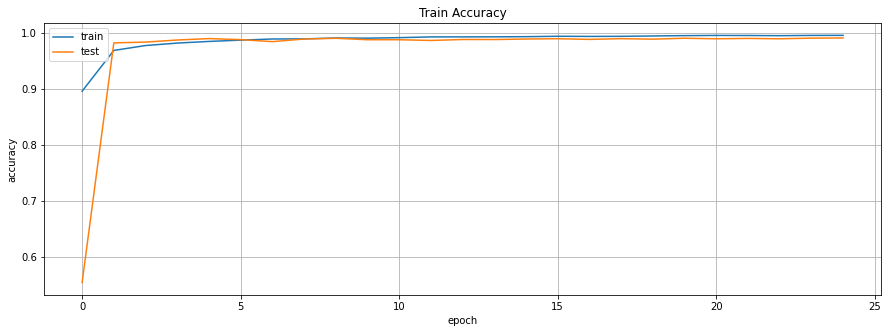

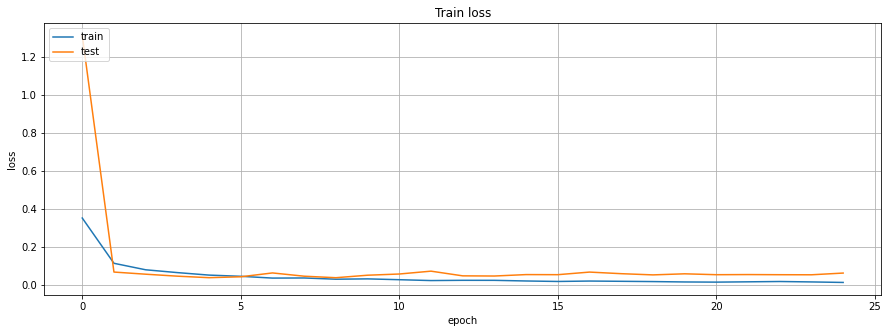

In [ ]:
#summary history for accuracy
plt.figure(figsize=(15,5))
plt.plot(cnn_history.history['acc'])
plt.plot(cnn_history.history['val_acc'])
plt.title('Train Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'] ,loc='upper left')
plt.grid()
plt.show()

#summary history for loss
plt.figure(figsize=(15,5))
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'] ,loc='upper left')
plt.grid()
plt.show()

In [ ]:
#Evaluate
cnn_results = cnn_model.evaluate(x_test, y_test, batch_size=128)
print(f"{cnn_model.metrics_names} = {cnn_results}")

79/79 [==============================] - 0s 4ms/step - loss: 0.0451 - acc: 0.9915
['loss', 'acc'] = [0.045051757246255875, 0.9915000200271606]


## Design, train and evaluate one MLP


In [ ]:
#0) Create model
mlp_model = tf.keras.models.Sequential()

#1) input layer
mlp_model.add(tf.keras.Input(shape=my_input_dim))

#2) Hidden Layer : Classifier
mlp_model.add( tf.keras.layers.Flatten()) #flat the input from Feature Extractor Shape=(batch_size,?)

mlp_model.add( tf.keras.layers.Dense(128, activation='relu' ))
mlp_model.add( tf.keras.layers.Dropout(0.2))

mlp_model.add( tf.keras.layers.Dense(128, activation= 'relu' ))
mlp_model.add( tf.keras.layers.Dropout(0.3))


#3) output layer
mlp_model.add( tf.keras.layers.Dense(my_output_dim, activation='softmax'))
mlp_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 128)               100480    
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               16512     
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-tr

In [ ]:
#Check model can imprement
%%time
#pass the data to model1 that create by Sequential API
y_mlp_pred = mlp_model.predict(x_test[0:7])
print( f"y_mlp_pred.shape={y_mlp_pred.shape}, y_mlp_pred.dtype={y_mlp_pred.dtype}, min(y_mlp_pred)={np.min(y_mlp_pred):.4f} ,max(y_mlp_pred)={np.max(y_mlp_pred):.4f}")

y_mlp_pred.shape=(7, 10), y_mlp_pred.dtype=float32, min(y_mlp_pred)=0.0562 ,max(y_mlp_pred)=0.1801
CPU times: user 70.9 ms, sys: 1.88 ms, total: 72.7 ms
Wall time: 71.2 ms


In [ ]:
#complie with default values for both optimizer and loss
mlp_model.compile( optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])

In [ ]:
#Train the model on train set
mlp_history = mlp_model.fit(x_train, y_train, batch_size=128, epochs=25, verbose=1, validation_split=0.2)

Epoch 1/25
375/375 [==============================] - 2s 3ms/step - loss: 0.4794 - acc: 0.8536 - val_loss: 0.1785 - val_acc: 0.9462
Epoch 2/25
375/375 [==============================] - 1s 3ms/step - loss: 0.2090 - acc: 0.9387 - val_loss: 0.1322 - val_acc: 0.9597
Epoch 3/25
375/375 [==============================] - 1s 3ms/step - loss: 0.1578 - acc: 0.9529 - val_loss: 0.1175 - val_acc: 0.9639
Epoch 4/25
375/375 [==============================] - 1s 3ms/step - loss: 0.1281 - acc: 0.9605 - val_loss: 0.0997 - val_acc: 0.9706
Epoch 5/25
375/375 [==============================] - 1s 3ms/step - loss: 0.1115 - acc: 0.9659 - val_loss: 0.0915 - val_acc: 0.9737
Epoch 6/25
375/375 [==============================] - 1s 3ms/step - loss: 0.0953 - acc: 0.9709 - val_loss: 0.0954 - val_acc: 0.9707
Epoch 7/25
375/375 [==============================] - 1s 3ms/step - loss: 0.0856 - acc: 0.9732 - val_loss: 0.0862 - val_acc: 0.9743
Epoch 8/25
375/375 [==============================] - 1s 3ms/step - loss: 0.

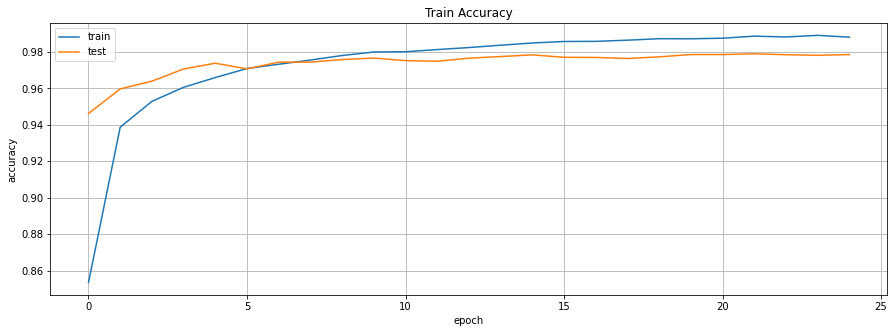

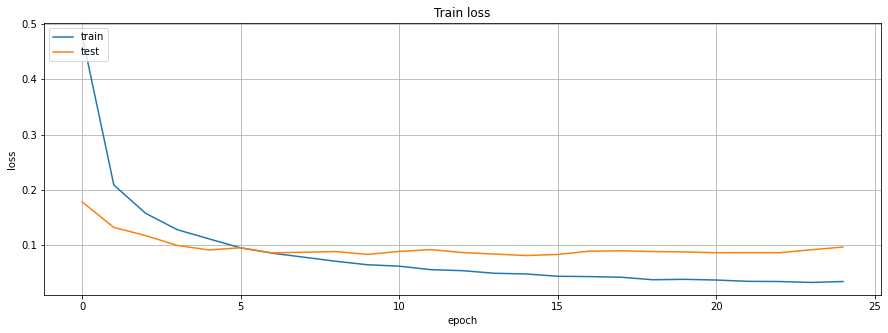

In [ ]:
#summary history for accuracy
plt.figure(figsize=(15,5))
plt.plot(mlp_history.history['acc'])
plt.plot(mlp_history.history['val_acc'])
plt.title('Train Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'] ,loc='upper left')
plt.grid()
plt.show()

#summary history for loss
plt.figure(figsize=(15,5))
plt.plot(mlp_history.history['loss'])
plt.plot(mlp_history.history['val_loss'])
plt.title('Train loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'] ,loc='upper left')
plt.grid()
plt.show()

In [ ]:
#Evaluate
mlp_results = mlp_model.evaluate(x_test, y_test, batch_size=128)
print(f"{mlp_model.metrics_names} = {mlp_results}")

79/79 [==============================] - 0s 2ms/step - loss: 0.0850 - acc: 0.9788
['loss', 'acc'] = [0.08497782796621323, 0.9787999987602234]
